<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Steven Fernando Barragan Montero <br>
Fecha: 27/07/2022

# Importación de librerias necesarias

In [1]:
#Importamos la libreria pandas
import pandas as pd 
#Importamos la libreria seaborn
import seaborn as sns
#Importamos la libreria numpy
import numpy as np
#Importamos LabelEncoder desde la libreria sklearn
from sklearn.preprocessing import LabelEncoder
#Importamos train_test_split desde la libreria sklearn
from sklearn.model_selection import train_test_split
#Importamos MinMaxScaler desde la libreria sklearn
from sklearn.preprocessing import MinMaxScaler
# Importamos DecisionTreeClassifier desde la libreria sklearn
from sklearn.tree import DecisionTreeClassifier
# Importamos metrics desde la libreria sklearn
from sklearn import metrics

## Cargar el Dataset

In [19]:
#Código para cargar el Dataset
df = pd.read_csv('https://raw.githubusercontent.com/sfbarragan/ArbolesDeDecisiones/master/salary.csv')
# Mostramos el dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Descripción de la fuente del Dataset

La extracción fue realizada por Barry Becker de la base de datos del censo de 1994.
La tarea de predicción es determinar si una persona gana más de 50K al año.

Las columnas son:<br>
**edad:** continuo.<br>
**clase de trabajo :** Privado, Auto-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Sin paga, Nunca trabajó.<br>
**fnlwgt :** continuo.<br>
**educación :** Licenciatura, Algo de universidad, 11.°, Graduado de HS, Escuela profesional, Assoc-acdm, Assoc-voc, 9.°, 7.° a 8.°, 12.°, Maestría, 1.° a 4.°, 10.°, Doctorado, 5.° a 6.°, Preescolar.<br>
**educación-num :** continuo.<br>
**estado civil :** Casado-civ-cónyuge, Divorciado, Nunca casado, Separado, Viudo, Casado-cónyuge-ausente, Casado-AF-cónyuge.<br>
**ocupación :** Soporte técnico, Reparación artesanal, Otros servicios, Ventas, Gerente ejecutivo, Especialidad profesional, Limpiadores de manipuladores, Inspección de máquinas, Administrativo, Agricultura-pesca, Transporte-mudanza, Casa privada- serv, Servicio de protección, Fuerzas Armadas.<br>
**parentesco :** Esposa, Hijo propio, Esposo, Fuera de la familia, Otro pariente, Soltero.<br>
**raza :** Blanco, Asiático-Pac-Isleño, Amer-Indio-Esquimal, Otro, Negro.<br>
**sexo :** Femenino, Masculino.<br>
**plusvalía :** continua.
**Pérdida de capital :** continua.<br>
**horas por semana :** continuo.<br>
**país nativo :** Estados Unidos, Camboya, Inglaterra, Puerto Rico, Canadá, Alemania, EE. UU. (Guam-USVI-etc), India, Japón, Grecia, Sur, China, Cuba, Irán, Honduras, Filipinas, Italia , Polonia, Jamaica, Vietnam, México, Portugal, Irlanda, Francia, República Dominicana, Laos, Ecuador, Taiwán, Haití, Colombia, Hungría, Guatemala, Nicaragua, Escocia, Tailandia, Yugoslavia, El-Salvador, Trinidad y Tobago, Perú, Hong , Holanda-Países Bajos.<br>
**salario :** <=50K o >50K

## Explique el problema a resolver. 
El dataset cuenta quecuenta con más de 32500 datos, busca predecir si una persona podra recibir un salario mayor o menor a 50000 dolares. La variable objetivo de este dataset lleva por nombre salario, y sus variables deentrada son edad, clase de trabajo, fnlwgt, educación, educacion_num, estado civil, ocupación, parentesco, raza, sexo, plusvalia, horas por semana, país nativo.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


# Número de instancias en total

In [20]:
#contar registros del dataset
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
salary            32561
dtype: int64

# Número de atributos de entrada, su significado y tipo

**edad:** continuo.<br>
**clase de trabajo :** Privado, Auto-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Sin paga, Nunca trabajó.<br>
**fnlwgt :** continuo.<br>
**educación :** Licenciatura, Algo de universidad, 11.°, Graduado de HS, Escuela profesional, Assoc-acdm, Assoc-voc, 9.°, 7.° a 8.°, 12.°, Maestría, 1.° a 4.°, 10.°, Doctorado, 5.° a 6.°, Preescolar.<br>
**educación-num :** continuo.<br>
**estado civil :** Casado-civ-cónyuge, Divorciado, Nunca casado, Separado, Viudo, Casado-cónyuge-ausente, Casado-AF-cónyuge.<br>
**ocupación :** Soporte técnico, Reparación artesanal, Otros servicios, Ventas, Gerente ejecutivo, Especialidad profesional, Limpiadores de manipuladores, Inspección de máquinas, Administrativo, Agricultura-pesca, Transporte-mudanza, Casa privada- serv, Servicio de protección, Fuerzas Armadas.<br>
**parentesco :** Esposa, Hijo propio, Esposo, Fuera de la familia, Otro pariente, Soltero.<br>
**raza :** Blanco, Asiático-Pac-Isleño, Amer-Indio-Esquimal, Otro, Negro.<br>
**sexo :** Femenino, Masculino.<br>
**plusvalía :** continua.
**Pérdida de capital :** continua.<br>
**horas por semana :** continuo.<br>
**país nativo :** Estados Unidos, Camboya, Inglaterra, Puerto Rico, Canadá, Alemania, EE. UU. (Guam-USVI-etc), India, Japón, Grecia, Sur, China, Cuba, Irán, Honduras, Filipinas, Italia , Polonia, Jamaica, Vietnam, México, Portugal, Irlanda, Francia, República Dominicana, Laos, Ecuador, Taiwán, Haití, Colombia, Hungría, Guatemala, Nicaragua, Escocia, Tailandia, Yugoslavia, El-Salvador, Trinidad y Tobago, Perú, Hong , Holanda-Países Bajos.<br>

In [21]:
#muestra la información (incluido el tipo de dato) de los 7 atributos de entrada.
df.drop('salary', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


# Estadísticas de la variable objetivo.

<AxesSubplot:>

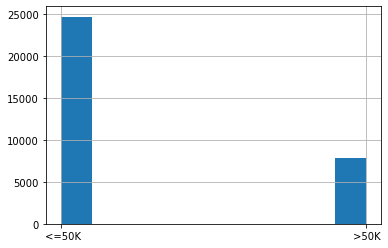

In [22]:
# Instanciamos la libreria matplotlib
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
df['salary'].hist()

# Estadísticas los atributos en relación con la variable objetivo.

In [23]:
#Creamnos la instancia de labelencoder
labelencoder = LabelEncoder()

#Transformamos los datos de la columna salary
df["salary"] = labelencoder.fit_transform(df["salary"])
#Transformamos los datos de la columna workclass
df["workclass"] = labelencoder.fit_transform(df["workclass"])
#Transformamos los datos de la columna education
df["education"] = labelencoder.fit_transform(df["education"])
#Transformamos los datos de la columna marital-status
df["marital-status"] = labelencoder.fit_transform(df["marital-status"])
#Transformamos los datos de la columna occupation
df["occupation"] = labelencoder.fit_transform(df["occupation"])
#Transformamos los datos de la columna relationship
df["relationship"] = labelencoder.fit_transform(df["relationship"])
#Transformamos los datos de la columna race
df["race"] = labelencoder.fit_transform(df["race"])
#Transformamos los datos de la columna sex
df["sex"] = labelencoder.fit_transform(df["sex"])
#Transformamos los datos de la columna native-country
df["native-country"] = labelencoder.fit_transform(df["native-country"])


In [24]:
#Definición de una función para encontrar la relación estadística de variable objetivo contra todas las variables categóricas
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    #Creación de una lista vacía de predictores o variables de entrada 
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        #Si el valor P de ANOVA es <0.05, eso significa que rechazamos H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:
#Llamar a la función para verificar qué variables categóricas están correlacionadas con la variable objetivo
CategoricalPredictorList=['age', 'education-num','capital-gain', 'capital-loss', 'workclass', 'hours-per-week', 'marital-status', 'education', 'occupation', 'relationship', 'race', 'sex', 'native-country'], 
FunctionAnova(inpData=df, 
              TargetVariable='salary', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

['age', 'education-num', 'capital-gain', 'capital-loss', 'workclass', 'hours-per-week', 'marital-status', 'education', 'occupation', 'relationship', 'race', 'sex', 'native-country'] is correlated with salary | P-Value: 3.3339996723991194e-102


[['age',
  'education-num',
  'capital-gain',
  'capital-loss',
  'workclass',
  'hours-per-week',
  'marital-status',
  'education',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country']]

La distribución de datos de la variable objetivo es satisfactoria para continuar. Hay un número suficiente de filas para cada tipo de valores de los que puede aprender el modelo.

Además se logro comprobar que las variables de entrada establecen una correlación con la variable objetivo del modelo. De esta forma determinamos que la modificación de los atributos de entrada del modelo afectara a la predicción del salario de la persona.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [26]:
# Preparamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('salary', axis=1),
                                                    df['salary'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [27]:
# Instanciamos scaler
scaler = MinMaxScaler()

# entrenamos el modelo
scaler.fit(X_train)

# transformamos los datos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Transformamos los datos de entrenamiento devueltos por el modelo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Transformamos los datos de test devueltos por el modelo
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

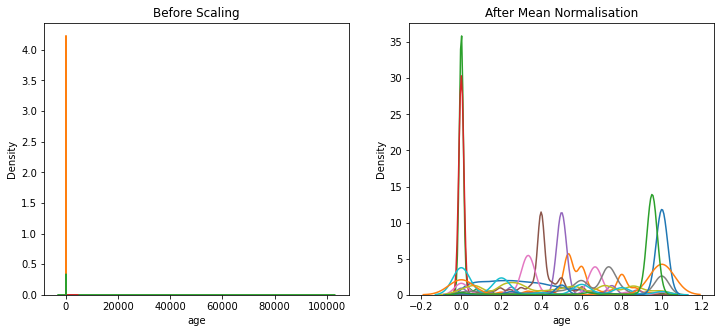

In [29]:
import matplotlib.pyplot as plt
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)
sns.kdeplot(X_train['education-num'], ax=ax1)
sns.kdeplot(X_train['capital-gain'], ax=ax1)
sns.kdeplot(X_train['capital-loss'], ax=ax1)
sns.kdeplot(X_train['workclass'], ax=ax1)
sns.kdeplot(X_train['hours-per-week'], ax=ax1)
sns.kdeplot(X_train['marital-status'], ax=ax1)
sns.kdeplot(X_train['education'], ax=ax1)
sns.kdeplot(X_train['occupation'], ax=ax1)
sns.kdeplot(X_train['relationship'], ax=ax1)
sns.kdeplot(X_train['race'], ax=ax1)
sns.kdeplot(X_train['sex'], ax=ax1)
sns.kdeplot(X_train['native-country'], ax=ax1)


# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
sns.kdeplot(X_train_scaled['education-num'], ax=ax2)
sns.kdeplot(X_train_scaled['capital-gain'], ax=ax2)
sns.kdeplot(X_train_scaled['capital-loss'], ax=ax2)
sns.kdeplot(X_train_scaled['workclass'], ax=ax2)
sns.kdeplot(X_train_scaled['hours-per-week'], ax=ax2)
sns.kdeplot(X_train_scaled['marital-status'], ax=ax2)
sns.kdeplot(X_train_scaled['education'], ax=ax2)
sns.kdeplot(X_train_scaled['occupation'], ax=ax2)
sns.kdeplot(X_train_scaled['relationship'], ax=ax2)
sns.kdeplot(X_train_scaled['race'], ax=ax2)
sns.kdeplot(X_train_scaled['sex'], ax=ax2)
sns.kdeplot(X_train_scaled['native-country'], ax=ax2)
plt.show()

## División del dataset en datos de entrenamiento y datos de test 

In [30]:
# Asignamos nuestras variables x
X = df[['age', 'education-num','capital-gain', 'capital-loss', 'workclass', 'hours-per-week', 'marital-status', 'education', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
# Asignamos nuestra variable y
y = df[['salary']]
# Dividimos los datos en entrenamiento y prueb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Verificamos la cantidad de datos
X_train.shape, X_test.shape

((22792, 13), (9769, 13))

## Modelamiento

In [31]:
# Instanciamos el arbol de decisiones
clf = DecisionTreeClassifier()

In [32]:
#Entrenamos el modelo con los datos de entrenamiento
clf = clf.fit(X_train,y_train)

In [33]:
# Realizamos la prediccion de los datos de prueba
y_pred = clf.predict(X_test)

In [34]:
# Mostramos el accuracy del modelo entrenado
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8253659535264612


In [ ]:
prediccion = y_pred ==y_test

## Evaluación del Modelo

El modelo de decision tree entrenado con 22792 datos, posee un nivel de exactitud del 82%, logrado durante el periodo de prueba efectuado con 9769 algo que a simple vista puede parecer un resultado aceptable, sin embargo el hecho de que el modelo posea un margen de error del 18% representa un problema para predecir los salarios de con exactitud. Sin embargo el modelo se adapto en gran medida a el tipo de clasificación que se presento (clasificación binaria),  